## Historic Data, Modern Models: California Housing Prices
author: R.H. Amezqueta <br>
date: 12-15-2024


**Auto ML analysis**

In [22]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#  seed
seed = 42

In [4]:
# Loading data (house_data.pkl)
house_data = pd.read_pickle('house_data.pkl')

In [5]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.431-b10, mixed mode)
  Starting server from C:\Users\rudyh\Desktop\Housing\env\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\rudyh\AppData\Local\Temp\tmphf9d0thv
  JVM stdout: C:\Users\rudyh\AppData\Local\Temp\tmphf9d0thv\h2o_rudyh_started_from_python.out
  JVM stderr: C:\Users\rudyh\AppData\Local\Temp\tmphf9d0thv\h2o_rudyh_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Asia/Shanghai
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,1 month and 17 days
H2O_cluster_name:,H2O_from_python_rudyh_nggg1h
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.505 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


## AutoML Model 1: Baseline

In [6]:
# H2O Frame
h2o_df = h2o.H2OFrame(house_data)

# Definition of features and target
features = [col for col in h2o_df.columns if col != "median_house_value"]
target = "median_house_value"

# Converting categorical column 
h2o_df["ocean_proximity"] = h2o_df["ocean_proximity"].asfactor()

train, test = h2o_df.split_frame(ratios=[0.8], seed=seed)

# AutoML training
aml = H2OAutoML(max_models=10, seed=42, sort_metric="MAE")
aml.train(x=features, y=target, training_frame=train)

# Leaderboard
lb = aml.leaderboard
print(lb)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:02:10.317: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                    mae     rmse          mse     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20241220_00210     29694    45362.1  2.05772e+09  0.222435               2.05772e+09
StackedEnsemble_BestOfFamily_1_AutoML_1_20241220_00210  30170.6  46091.5  2.12443e+09  0.225436               2.12443e+09
GBM_4_AutoML_1_20241220_00210                           30229.5  46099.2  2.12514e+09  0.226207               2.12514e+09
GBM_3_AutoML_1_20241220_00210                           30363.2  46092.2  2.12449e+09  0.227215               2.12449e+09
GBM_2_AutoML_1_20241220_00210                           30707.4  46443.1  2.15697e+09  0.229204               2.15697e+09
GBM_1_AutoML_1_

In [7]:
# Best model
best_model = aml.leader

# Prediction on test data
predictions = best_model.predict(test)

# Performance evaluation
performance = best_model.model_performance(test_data=test)
print(performance)

# Empty DataFrame to store results
performance_eval = pd.DataFrame()

#Relevant metrics extraction
metrics = {
    'model_id': best_model.model_id,
    'RMSE': performance.rmse(),
    'MSE': performance.mse(),
    'MAE': performance.mae(),
    'R2': performance.r2()
}

# Converting metrics to a DataFrame 
metrics_df = pd.DataFrame([metrics])

# Appending the metrics as a new row in the DataFrame
performance_eval = pd.concat([performance_eval, metrics_df], ignore_index=True)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 2079538295.9092727
RMSE: 45601.95495709885
MAE: 29618.47824019947
RMSLE: 0.22476910928897825
Mean Residual Deviance: 2079538295.9092727
R^2: 0.8455676430160968
Null degrees of freedom: 4011
Residual degrees of freedom: 4007
Null deviance: 54024445147680.055
Residual deviance: 8343107643188.002
AIC: 97476.67466282676


- The model shows strong predictive performance with an R² of 0.846, indicating that it explains 84.6% of the variance in the median_house_value. This suggests that the features used are highly relevant and the model is capturing most of the underlying patterns in the data.<br>
 - The RMSE being significantly larger than the MAE suggests that the model may struggle with larger errors for certain data points. Outliers or highly variable house prices could be contributing to this.
 - On average, the model's predictions are off by approximately 29,618USD

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


c:\Users\rudyh\Desktop\Housing\env\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\Users\rudyh\Desktop\Housing\env\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


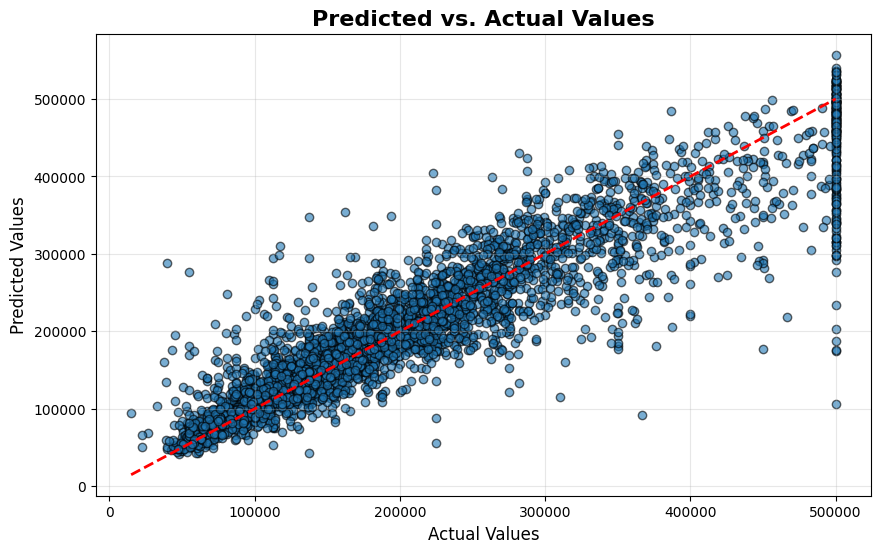

In [8]:
# Prediction on the test set
predictions = aml.leader.predict(test).as_data_frame()
actual = test[target].as_data_frame()

# Scatter plot of actual vs. predicted
plt.figure(figsize=(10, 6))
plt.scatter(actual, predictions, alpha=0.6, edgecolor='k')
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', linewidth=2, label='Perfect Prediction') 
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title("Predicted vs. Actual Values",fontsize=16, fontweight='bold')
plt.grid(alpha=0.3)
plt.show()

As we can see, most points fall close to the red dashed diagonal line, indicating that the model's predictions are generally accurate. However, there's a clear vertical clustering of points near the maximum actual value (around 500,000). As mentioned before, this indicates that the target variable (median_house_value) is capped at a maximum value.

## AutoML Model2: Engineering Features

In this step, I aim to determine whether using derived features can enhance the model's predictive power.

The modifications include:

- rooms_household = total_rooms / households → captures housing density
- bedrooms_per_room = total_bedrooms / total_rooms → reflects the housing layout
- population_per_household = population / households → captures average household size
- rooms_per_capita = total_rooms / population → relates housing availability to population
- location_interaction = longitude * latitude → captures the combined spatial effect of location
- income_per_room = median_income / total_rooms → relates income to available rooms
- Dummy variables for the categorical feature ocean_proximity

In [9]:
# Copy of the original dataframe
house_data_mod = house_data.copy()

In [10]:
# Housing density: Rooms per household
house_data_mod['rooms_per_household'] = house_data_mod['total_rooms'] / house_data_mod['households']

# Housing layout: Bedrooms per room
house_data_mod['bedrooms_per_room'] = house_data_mod['total_bedrooms'] / house_data_mod['total_rooms']

# Average household size: Population per household
house_data_mod['population_per_household'] = house_data_mod['population'] / house_data_mod['households']

# Housing to population relationship: Rooms per capita
house_data_mod['rooms_per_capita'] = house_data_mod['total_rooms'] / house_data_mod['population']

# Interaction between longitude and latitude
house_data_mod['location_interaction'] = house_data_mod['longitude'] * house_data_mod['latitude']

# Interaction between median_income and total_rooms
house_data_mod['income_per_room'] = house_data_mod['median_income'] / house_data_mod['total_rooms']

# Handling potential divisions by zero in total_rooms
house_data_mod['income_per_room'].replace([float('inf'), -float('inf')], 0, inplace=True)

# One-hot encoding the 'ocean_proximity' column
house_data_mod = pd.get_dummies(house_data_mod, columns=['ocean_proximity'], drop_first=True)

C:\Users\rudyh\AppData\Local\Temp\ipykernel_15948\3016696878.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_data_mod['income_per_room'].replace([float('inf'), -float('inf')], 0, inplace=True)


In [11]:
# H2O Frame
h2o_df = h2o.H2OFrame(house_data_mod)

# Definition of features and target
features = [col for col in h2o_df.columns if col != "median_house_value"]
target = "median_house_value"

train, test = h2o_df.split_frame(ratios=[0.8], seed=seed)

# AutoML training
aml = H2OAutoML(max_models=10, seed=42, sort_metric="MAE")
aml.train(x=features, y=target, training_frame=train)

# Leaderboard
lb = aml.leaderboard
print(lb)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:02:57.512: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                    mae     rmse          mse     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_2_20241220_00257     28654.3  44390    1.97047e+09  0.214204               1.97047e+09
StackedEnsemble_BestOfFamily_1_AutoML_2_20241220_00257  29145.7  45185    2.04168e+09  0.216831               2.04168e+09
GBM_4_AutoML_2_20241220_00257                           29246    45253.1  2.04784e+09  0.218551               2.04784e+09
GBM_3_AutoML_2_20241220_00257                           29567.5  45323.9  2.05426e+09  0.219748               2.05426e+09
GBM_1_AutoML_2_20241220_00257                           29757.1  45456.6  2.0663e+09   0.221132               2.0663e+09
GBM_2_AutoML_2_2

In [12]:
# Best model
best_model_2 = aml.leader

# Prediction on test data
predictions_2 = best_model_2.predict(test)

# Performance evaluation
performance_2 = best_model_2.model_performance(test_data=test)
print(performance_2)

#Relevant metrics extraction
metrics = {
    'model_id': best_model_2.model_id,
    'RMSE': performance_2.rmse(),
    'MSE': performance_2.mse(),
    'MAE': performance_2.mae(),
    'R2': performance_2.r2()
}

# Converting metrics to a DataFrame (single row)
metrics_df_2 = pd.DataFrame([metrics])

# Appending the metrics as a new row in the DataFrame
performance_eval = pd.concat([performance_eval, metrics_df_2], ignore_index=True)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 1973020912.123781
RMSE: 44418.700027395906
MAE: 28874.35160954875
RMSLE: 0.21745088367484752
Mean Residual Deviance: 1973020912.123781
R^2: 0.8534779232307537
Null degrees of freedom: 4011
Residual degrees of freedom: 4005
Null deviance: 54024445147680.055
Residual deviance: 7915759899440.609
AIC: 97269.72342271583


The results show a clear improvement in model performance after applying feature engineering:<br>
- Both RMSE and MAE decreased, showing a reduction in the magnitude of large prediction errors and in average prediction error.
- The R² increased from 0.846 to 0.855, meaning the model now explains approximately 85.5% of the variance in the target variable, an improvement of 1% approximately.

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


c:\Users\rudyh\Desktop\Housing\env\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\Users\rudyh\Desktop\Housing\env\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


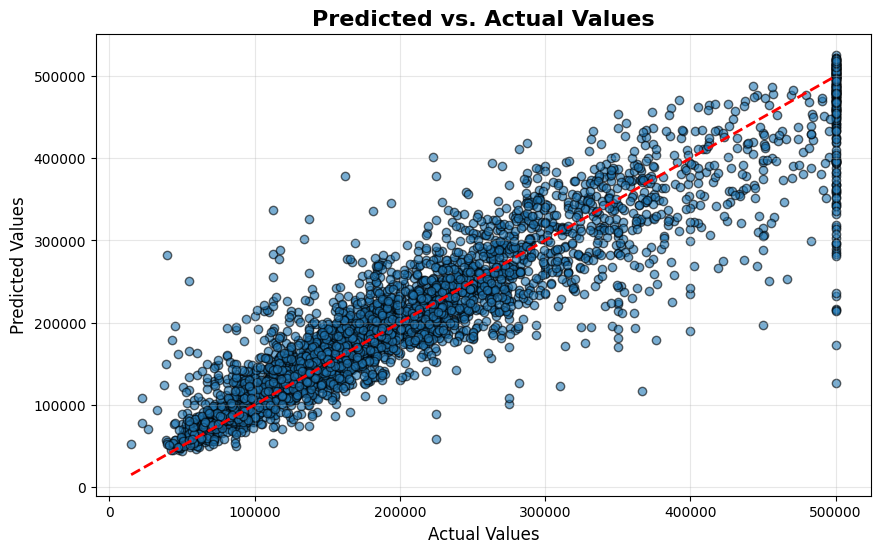

In [13]:
# Prediction on the test set
predictions = aml.leader.predict(test).as_data_frame()
actual = test[target].as_data_frame()

# Scatter plot of actual vs. predicted
plt.figure(figsize=(10, 6))
plt.scatter(actual, predictions, alpha=0.6, edgecolor='k')
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', linewidth=2, label='Perfect Prediction') 
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title("Predicted vs. Actual Values",fontsize=16, fontweight='bold')
plt.grid(alpha=0.3)
plt.show()

- Once again, and since the model's improved, most points align closely with the red dashed diagonal line, indicating that the model is performing well in predicting values overall. Predictions are relatively accurate across the majority of the range.
- Similar to the previous model, there is vertical clustering of points near the maximum actual value (500,001). This confirms that the target variable (median_house_value) is capped, causing the model to predict values around the upper bound inconsistently.
- The scatterplot shows slightly larger residuals (deviations from the diagonal) for mid-range values. This indicates that while predictions are reasonable, errors are more noticeable in this range compared to lower values.

## AutoML Model3: Capped Values

This time, I will address the capped value issue by introducing a new variable, "is_capped", which will be set to 1 if the value equals the cap (500,001USD) and 0 otherwise.

In [14]:
# Copy of house_data_mod
house_data_full = house_data_mod

In [15]:
house_data_full['is_capped'] = (house_data_full['median_house_value'] == 500001).astype(int)

In [16]:
# H2O Frame
h2o_df = h2o.H2OFrame(house_data_full)

# Definition of features and target
features = [col for col in h2o_df.columns if col != "median_house_value"]
target = "median_house_value"


train, test = h2o_df.split_frame(ratios=[0.8], seed=seed)

# AutoML training
aml = H2OAutoML(max_models=10, seed=42, sort_metric="MAE")
aml.train(x=features, y=target, training_frame=train)

# Leaderboard
lb = aml.leaderboard
print(lb)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:04:29.781: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                    mae     rmse          mse       rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_3_20241220_00429     25946.6  39728.8  1.57837e+09    0.204618               1.57837e+09
StackedEnsemble_BestOfFamily_1_AutoML_3_20241220_00429  26302.9  40301    1.62417e+09    0.207302               1.62417e+09
GBM_4_AutoML_3_20241220_00429                           26349    40328.1  1.62636e+09    0.208215               1.62636e+09
GBM_3_AutoML_3_20241220_00429                           26716    40418.8  1.63368e+09    0.209801               1.63368e+09
GBM_1_AutoML_3_20241220_00429                           27002.1  40858.7  1.66943e+09    0.211647               1.66943e+09
GBM

In [17]:
# Best model
best_model_3 = aml.leader

# Prediction on test data
predictions_3 = best_model_3.predict(test)

# Performance evaluation
performance_3 = best_model_3.model_performance(test_data=test)
print(performance_3)

#Relevant metrics extraction
metrics = {
    'model_id': best_model_3.model_id,
    'RMSE': performance_3.rmse(),
    'MSE': performance_3.mse(),
    'MAE': performance_3.mae(),
    'R2': performance_3.r2()
}

# Converting metrics to a DataFrame (single row)
metrics_df_3 = pd.DataFrame([metrics])

# Appending the metrics as a new row in the DataFrame
performance_eval = pd.concat([performance_eval, metrics_df_3], ignore_index=True)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 1533412104.1241908
RMSE: 39158.80621423732
MAE: 25830.410962258364
RMSLE: 0.20719351514392276
Mean Residual Deviance: 1533412104.1241908
R^2: 0.8861245085347171
Null degrees of freedom: 4011
Residual degrees of freedom: 4006
Null deviance: 54024445147680.055
Residual deviance: 6152049361746.254
AIC: 96256.41681594179


This model shows a significant improvement: 
- RMSE dropped, indicating a smaller spread of prediction errors.
- MAE improved, confirming the reduction in average absolute error.
- The R² increased from 0.855 to 0.886, meaning the model now explains 88.6% of the variance in the target variable. This is a considerable improvement.

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


c:\Users\rudyh\Desktop\Housing\env\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\Users\rudyh\Desktop\Housing\env\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


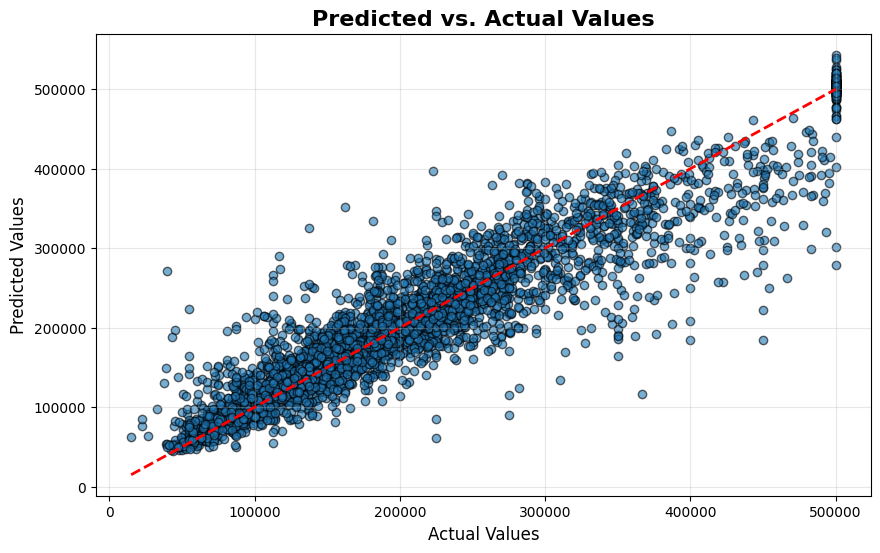

In [18]:
# Prediction on the test set
predictions = aml.leader.predict(test).as_data_frame()
actual = test[target].as_data_frame()

# Scatter plot of actual vs. predicted
plt.figure(figsize=(10, 6))
plt.scatter(actual, predictions, alpha=0.6, edgecolor='k')
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', linewidth=2, label='Perfect Prediction') 
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title("Predicted vs. Actual Values",fontsize=16, fontweight='bold')
plt.grid(alpha=0.3)
plt.show()

- Most of the points are now closer to the red dashed diagonal line, indicating improved alignment between predicted and actual values.
- While there is still vertical clustering near the capped value (500,001), the predictions in this region are now more tightly grouped. This indicates that adding the "is_capped" feature helped the model better recognize and handle capped values.
- The scatterplot shows a reduction in the spread of errors, particularly for mid-to-high values, reflecting the improvements observed in the RMSE and MAE metrics.
- Compared to previous models, there are fewer extreme deviations above or below the red line, meaning the model is less prone to significant underprediction or overprediction.

In [19]:
# Copy of the dataframe 
autoML_performance = performance_eval

In [20]:
# Changing row names
new_names = ['AutoML_Baseline', 'AutoML_Features', 'AutoML_Capped']
autoML_performance['model_id'] = new_names

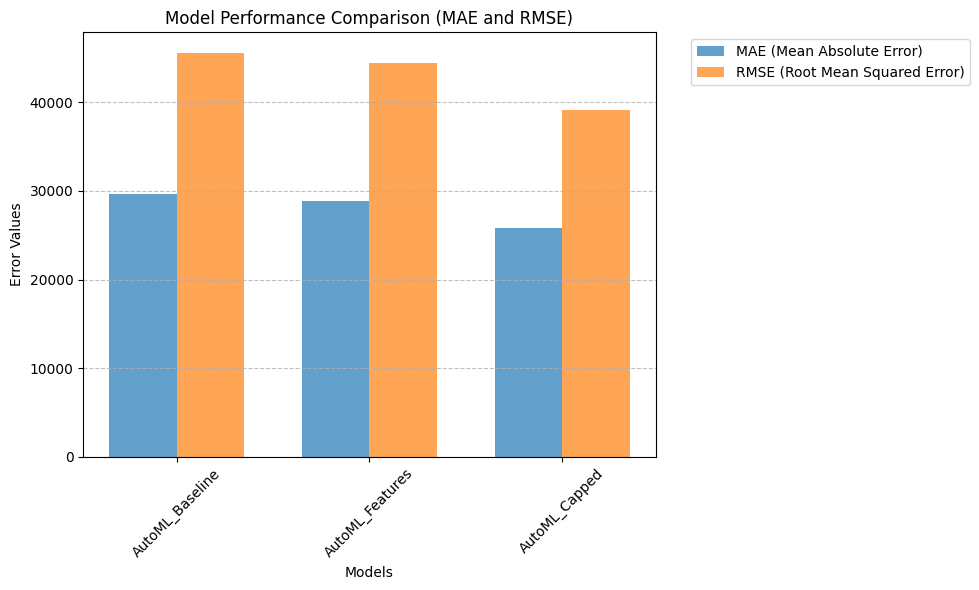

In [23]:
# Extracting data
models = autoML_performance['model_id']
mae_values = autoML_performance['MAE']
rmse_values = autoML_performance['RMSE']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35  # Width of the bars
x = np.arange(len(models))  # X-axis positions

# MAE Bars
ax.bar(x - bar_width/2, mae_values, bar_width, label='MAE (Mean Absolute Error)', alpha=0.7)
# RMSE Bars
ax.bar(x + bar_width/2, rmse_values, bar_width, label='RMSE (Root Mean Squared Error)', alpha=0.7)

# Add grid lines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.8)

# Adding labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Error Values')
ax.set_title('Model Performance Comparison (MAE and RMSE)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))  # Position legend outside the plot

# Rotate x-axis labels
plt.xticks(rotation=45)


# Display the plot
plt.tight_layout()
plt.show()

**Conclusion about AutoML**<br>
Through iterative improvements that combined AutoML with feature engineering, the model's performance has significantly improved. Starting with a strong baseline, the introduction of derived features and the "is_capped" variable effectively addressed the capped target value issue at 500,001. These modifications resulted in a notable reduction in errors and a higher explained variance. The final model is now more accurate and robust. 

In [25]:
performance_eval.to_pickle('automl_performance.pkl')

In [24]:
house_data_full.to_pickle('house_full.pkl')